/tmp/ipykernel_16099/2578252810.py:22: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16099/2578252810.py:22: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16099/2578252810.py:22: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16099/2578252810.py:22: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16099/2578252810.py:22: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16099/2578252810.py:22: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/xcg/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:

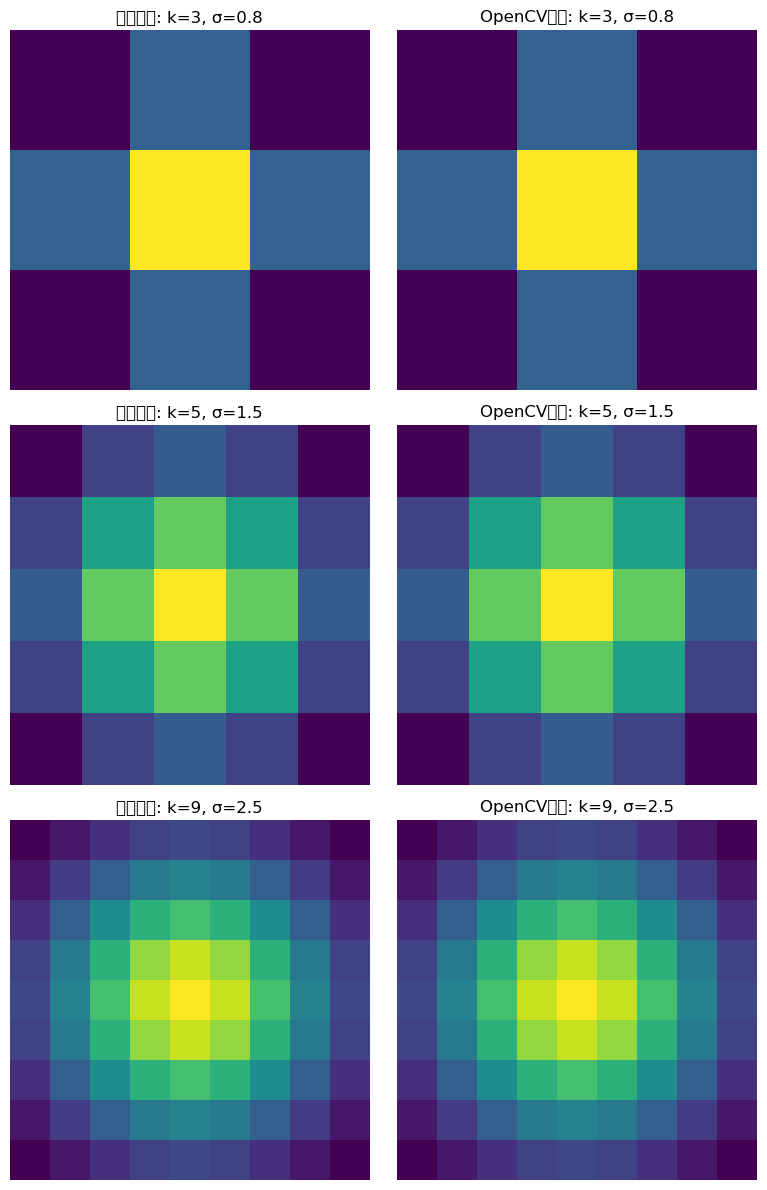

k=3, σ=0.8 的平均差异: 0.000000
k=5, σ=1.5 的平均差异: 0.000000
k=9, σ=2.5 的平均差异: 0.000000


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def manual_gaussian_kernel(ksize, sigma):
    k = ksize // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    g = g / g.sum()  
    return g

def show_kernels_comparison(kernels_manual, kernels_opencv, params):
    fig, axes = plt.subplots(len(params), 2, figsize=(8, 4 * len(params)))
    for i, ((ksize, sigma), km, ko) in enumerate(zip(params, kernels_manual, kernels_opencv)):
        ax1, ax2 = axes[i]
        ax1.imshow(km, cmap='viridis')
        ax1.set_title(f"手动实现: k={ksize}, σ={sigma}")
        ax1.axis('off')
        ax2.imshow(ko, cmap='viridis')
        ax2.set_title(f"OpenCV生成: k={ksize}, σ={sigma}")
        ax2.axis('off')
    plt.tight_layout()
    plt.show()

params = [(3, 0.8), (5, 1.5), (9, 2.5)]

kernels_manual = [manual_gaussian_kernel(k, s) for k, s in params]
kernels_opencv = [cv2.getGaussianKernel(k, s) @ cv2.getGaussianKernel(k, s).T for k, s in params]

show_kernels_comparison(kernels_manual, kernels_opencv, params)

for (ksize, sigma), km, ko in zip(params, kernels_manual, kernels_opencv):
    diff = np.abs(km - ko).mean()
    print(f"k={ksize}, σ={sigma} 的平均差异: {diff:.6f}")

/tmp/ipykernel_16099/152720334.py:46: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16099/152720334.py:46: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/xcg/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xcg/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


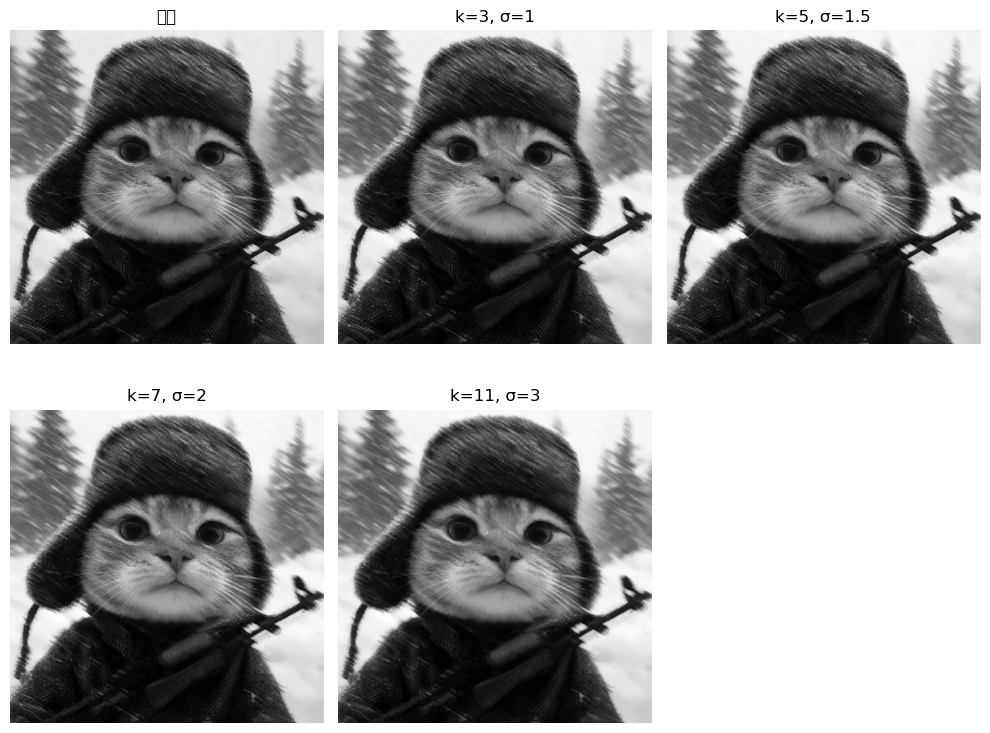

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def gaussian_kernel(size, sigma):
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel

def convolve2d(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    result = np.zeros_like(image, dtype=float)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)
    
    return result

img = Image.open('/home/xcg/桌面/xcg.jpg').convert('L')  
img = np.array(img, dtype=float)

params = [(3, 1), (5, 1.5), (7, 2), (11, 3)]

plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('原图')
plt.axis('off')

for i, (ksize, sigma) in enumerate(params, start=2):
    kernel = gaussian_kernel(ksize, sigma)
    blurred = convolve2d(img, kernel)
    plt.subplot(2, 3, i)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'k={ksize}, σ={sigma}')
    plt.axis('off')

plt.tight_layout()
plt.show()

/tmp/ipykernel_16099/1403416092.py:57: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16099/1403416092.py:57: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/xcg/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xcg/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


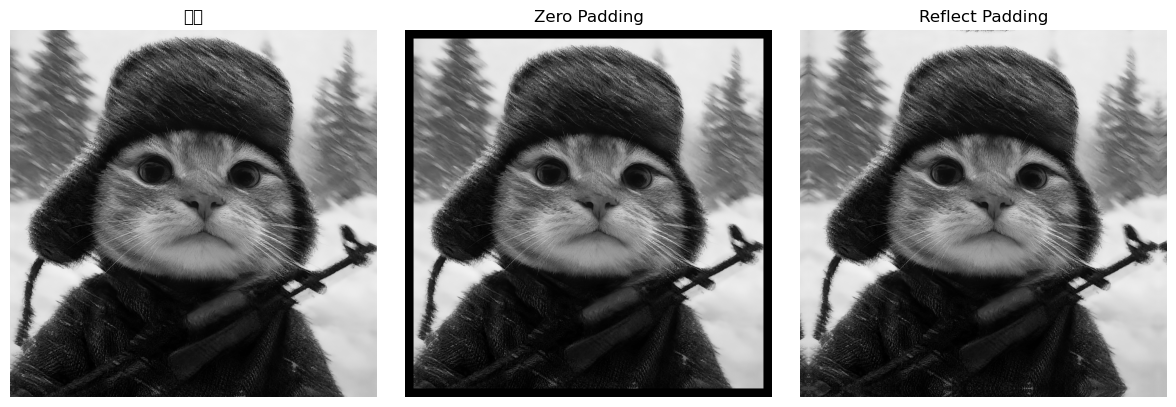

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def pad_image(img, pad_h, pad_w, mode='zero'):
    h, w = img.shape
    new_h, new_w = h + 2 * pad_h, w + 2 * pad_w
    padded = np.zeros((new_h, new_w), dtype=img.dtype)

    if mode == 'zero':
        padded[pad_h:pad_h+h, pad_w:pad_w+w] = img

    elif mode == 'reflect':
        padded[pad_h:pad_h+h, pad_w:pad_w+w] = img
        padded[:pad_h, pad_w:pad_w+w] = img[pad_h:0:-1, :]
        padded[pad_h+h:, pad_w:pad_w+w] = img[-2:-2-pad_h:-1, :]
        padded[:, :pad_w] = padded[:, 2*pad_w:pad_w:-1]
        padded[:, pad_w+w:] = padded[:, -pad_w-1:-2*pad_w-1:-1]
    else:
        raise ValueError("mode 参数只能是 'zero' 或 'reflect'")

    return padded

img_path = '/home/xcg/桌面/xcg.jpg'
img = Image.open(img_path).convert('L')
img = np.array(img)

pad_h, pad_w = 50, 50

padded_zero = pad_image(img, pad_h, pad_w, mode='zero')
padded_reflect = pad_image(img, pad_h, pad_w, mode='reflect')

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('原图')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(padded_zero, cmap='gray')
plt.title('Zero Padding')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(padded_reflect, cmap='gray')
plt.title('Reflect Padding')
plt.axis('off')

plt.tight_layout()
plt.show()
